# WeatherPy
----

## Import dependencies

In [1]:
import numpy as np
import requests
import scipy.stats as st
from scipy import stats

# Import Pandas library
import pandas as pd

#Import matplotlib for creating and plotting graphs
import matplotlib.pyplot as plt
from datetime import datetime

# Import API key
import sys
sys.path.append("..")
from api_keys import weather_api_key

# Import citipy to determine city based on latitude and longitude
from citipy import citipy

# Import random to generate random latitude and longitudes
import random 

# Output File (CSV)
output_data_file = "output_data/cities.csv"


## Generate Cities List

In [2]:
# Create empty lists for recording Cities and latitude = (-90, 90) / longitude = (-180, 180)
# Range of latitudes and longitudes

cities = []

while len(cities)<500: # iterate through loop until the cities list contains 500 random cities appended
    x = (random.choice(range(-90, 90))) # randomly generate numbers in range -90 & 90 for latitude
    y = (random.choice(range(-180,180))) # randomly generagte numbers in range -180 & 180 for longitude
    city = citipy.nearest_city(x,y).city_name # look up city to match the lat & long randomly generated
    if city not in cities:
        cities.append(city)

# Print the city count

len(cities)

500

In [3]:
cities

['buchanan',
 'nisia floresta',
 'tumut',
 'rikitea',
 'jamestown',
 'belushya guba',
 'tiruchchendur',
 'taolanaro',
 'mount gambier',
 'thompson',
 'victoria',
 'milkovo',
 'alyangula',
 'bowen',
 'valer',
 'harper',
 'albany',
 'cherskiy',
 'port blair',
 'georgetown',
 'butaritari',
 'lakselv',
 'khatanga',
 'vaini',
 'angermunde',
 'castro',
 'dikson',
 'bajil',
 'hobart',
 'nola',
 'hilo',
 'itoman',
 'tabialan',
 'roald',
 'mitu',
 'yellowknife',
 'galiwinku',
 'ponta do sol',
 'illoqqortoormiut',
 'ouesso',
 'haimen',
 'perelyub',
 'marsh harbour',
 'ushuaia',
 'tsybuliv',
 'ziro',
 'puerto carreno',
 'gimli',
 'dingle',
 'tulun',
 'new norfolk',
 'airai',
 'grenfell',
 'grand river south east',
 'chokurdakh',
 'sitka',
 'broken hill',
 'vila franca do campo',
 'youkounkoun',
 'ambon',
 'saint-philippe',
 'ostrovnoy',
 'chinsali',
 'cape town',
 'roma',
 'clyde river',
 'talcahuano',
 'sao filipe',
 'touros',
 'barentsburg',
 'bredasdorp',
 'tautira',
 'barrow',
 'zonguldak',
 

In [4]:
city_stats = requests.get(f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q=victoria").json()

In [5]:
city_stats

{'coord': {'lon': 114.1577, 'lat': 22.2855},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 24.4,
  'feels_like': 24.91,
  'temp_min': 21.11,
  'temp_max': 25.56,
  'pressure': 1009,
  'humidity': 77},
 'visibility': 10000,
 'wind': {'speed': 4.02, 'deg': 241, 'gust': 4.93},
 'rain': {'1h': 0.18},
 'clouds': {'all': 0},
 'dt': 1619101597,
 'sys': {'type': 3,
  'id': 2035800,
  'country': 'HK',
  'sunrise': 1619042266,
  'sunset': 1619088341},
 'timezone': 28800,
 'id': 1819729,
 'name': 'Hong Kong',
 'cod': 200}

In [6]:
city_stats["main"]

{'temp': 24.4,
 'feels_like': 24.91,
 'temp_min': 21.11,
 'temp_max': 25.56,
 'pressure': 1009,
 'humidity': 77}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

count = 1 # counter to count the number of calls to API
sets = 1 # counter to count the number of call sets

# Create empty lists to store the data for each field
city_name_list = []
lat_list = []
lng_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []
country_list = []
date_list = []

print(f'Beginning Data Retrieval \n ........................')

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    city_stats = requests.get(query_url + city).json()
    
    # Retrieve the items for each field and append to the empty lists  
    try:
            
        city_name = city_stats['name']
        city_name_list.append(city_name)
        
        lat = city_stats['coord']['lat']
        lat_list.append(lat)
        
        lng = city_stats['coord']['lon']
        lng_list.append(lng)
        
        temp = city_stats['main']['temp_max']
        temp_list.append(temp)
        
        humidity = city_stats['main']['humidity']
        humidity_list.append(humidity)
        
        clouds = city_stats['clouds']['all']
        clouds_list.append(clouds)
        
        wind_speed = city_stats['wind']['speed']
        wind_speed_list.append(wind_speed)

        country_name = city_stats['sys']['country']
        country_list.append(country_name)
        
        date = city_stats['dt']
        date_list.append(date)

        print(f'Processing Record {count} of Set {sets} | {city}')
    
    # Print error message and move on to the next city if there is an error
    except:
        
        print("City not found. Skipping...")
        
print(f'........................\n Data Retrieval Complete \n ........................')


Beginning Data Retrieval 
 ........................
Processing Record 1 of Set 1 | buchanan
Processing Record 1 of Set 1 | nisia floresta
Processing Record 1 of Set 1 | tumut
Processing Record 1 of Set 1 | rikitea
Processing Record 1 of Set 1 | jamestown
City not found. Skipping...
Processing Record 1 of Set 1 | tiruchchendur
City not found. Skipping...
Processing Record 1 of Set 1 | mount gambier
Processing Record 1 of Set 1 | thompson
Processing Record 1 of Set 1 | victoria
Processing Record 1 of Set 1 | milkovo
Processing Record 1 of Set 1 | alyangula
Processing Record 1 of Set 1 | bowen
Processing Record 1 of Set 1 | valer
Processing Record 1 of Set 1 | harper
Processing Record 1 of Set 1 | albany
Processing Record 1 of Set 1 | cherskiy
Processing Record 1 of Set 1 | port blair
Processing Record 1 of Set 1 | georgetown
Processing Record 1 of Set 1 | butaritari
Processing Record 1 of Set 1 | lakselv
Processing Record 1 of Set 1 | khatanga
Processing Record 1 of Set 1 | vaini
Process

Processing Record 1 of Set 1 | rio verde de mato grosso
Processing Record 1 of Set 1 | faya
Processing Record 1 of Set 1 | hovd
Processing Record 1 of Set 1 | half moon bay
Processing Record 1 of Set 1 | hobyo
Processing Record 1 of Set 1 | uruzgan
Processing Record 1 of Set 1 | atar
Processing Record 1 of Set 1 | bogatynia
Processing Record 1 of Set 1 | faanui
City not found. Skipping...
Processing Record 1 of Set 1 | east london
Processing Record 1 of Set 1 | gilgit
Processing Record 1 of Set 1 | omboue
Processing Record 1 of Set 1 | aklavik
City not found. Skipping...
Processing Record 1 of Set 1 | marsa matruh
Processing Record 1 of Set 1 | mbandaka
Processing Record 1 of Set 1 | norman wells
Processing Record 1 of Set 1 | ha giang
Processing Record 1 of Set 1 | kahului
Processing Record 1 of Set 1 | teya
Processing Record 1 of Set 1 | lokoja
Processing Record 1 of Set 1 | purranque
Processing Record 1 of Set 1 | coihaique
Processing Record 1 of Set 1 | alta floresta
Processing Rec

Processing Record 1 of Set 1 | roswell
Processing Record 1 of Set 1 | kirya
Processing Record 1 of Set 1 | coahuayana
Processing Record 1 of Set 1 | presidencia roque saenz pena
Processing Record 1 of Set 1 | gwanda
Processing Record 1 of Set 1 | bayir
Processing Record 1 of Set 1 | pedernales
Processing Record 1 of Set 1 | iwanai
Processing Record 1 of Set 1 | ranau
Processing Record 1 of Set 1 | ohara
Processing Record 1 of Set 1 | kasongo-lunda
Processing Record 1 of Set 1 | bathsheba
Processing Record 1 of Set 1 | mizan teferi
Processing Record 1 of Set 1 | kerema
Processing Record 1 of Set 1 | sao felix do xingu
Processing Record 1 of Set 1 | great yarmouth
Processing Record 1 of Set 1 | isangel
Processing Record 1 of Set 1 | pietarsaari
Processing Record 1 of Set 1 | karaman
Processing Record 1 of Set 1 | requena
Processing Record 1 of Set 1 | juneau
Processing Record 1 of Set 1 | malakal
Processing Record 1 of Set 1 | ancud
Processing Record 1 of Set 1 | bud
Processing Record 1 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
print(len(city_name_list))
print(len(lat_list))
print(len(lng_list))   
print(len(temp_list))         
print(len(humidity_list))   
print(len(clouds_list))    
print(len(wind_speed_list))       
print(len(country_list))    
print(len(date_list))


458
458
458
458
458
458
458
458
458


In [9]:
# Convert and display data in dataframe

cities_df = pd.DataFrame({
                'City': city_name_list,
                'Lat': lat_list, 
                'Lng': lng_list, 
                'Max Temp': temp_list,
                'Humidity': humidity_list, 
                'Clouds': clouds_list,
                'Wind Speed': wind_speed_list,
                'Country': country_list, 
                'Date': date_list})

cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Buchanan,5.8808,-10.0467,32.00,70,75,5.14,LR,1619101829
1,Nísia Floresta,-6.0911,-35.2086,30.00,70,75,5.14,BR,1619101830
2,Tumut,-35.3000,148.2167,10.00,81,90,1.33,AU,1619101830
3,Rikitea,-23.1203,-134.9692,25.57,73,99,8.03,PF,1619101830
4,Jamestown,42.0970,-79.2353,0.56,69,90,6.17,US,1619101830


In [10]:
# Export to .csv file
cities_df.to_csv("../output_data/cities.csv", index=False, header=True)

In [11]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Date
count,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,4.580000e+02
mean,19.603498,17.882157,16.048166,66.936681,56.901747,3.909498,1.619102e+09
std,33.971754,91.317350,12.419725,22.938848,37.024818,2.716404,6.338372e+01
min,-54.800000,-175.200000,-23.270000,5.000000,0.000000,0.170000,1.619101e+09
25%,-8.134500,-60.424025,7.047500,54.000000,20.000000,1.992500,1.619102e+09
50%,22.862100,22.308350,18.165000,70.000000,71.500000,3.305000,1.619102e+09
75%,49.069825,99.946350,25.967500,86.000000,90.000000,5.140000,1.619102e+09
max,78.218600,179.316700,41.750000,100.000000,100.000000,19.190000,1.619102e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
cities_df.loc[cities_df['Humidity'] >100].count()

City          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Clouds        0
Wind Speed    0
Country       0
Date          0
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

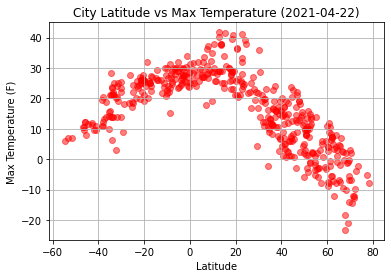

In [13]:
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], color='r', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.savefig("../images/LatVsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

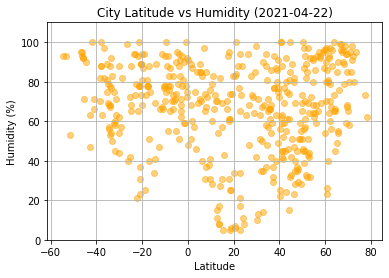

In [14]:
plt.scatter(cities_df["Lat"], cities_df["Humidity"], color='orange', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')
plt.ylim(0,(cities_df["Humidity"].max()+10))
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.savefig("../images/LatVsHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

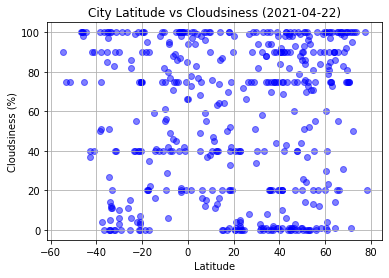

In [15]:
plt.scatter(cities_df["Lat"], cities_df["Clouds"], color='b', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudsiness (%)')
plt.title(f'City Latitude vs Cloudsiness ({datetime.now().date()})')
plt.ylim(-5,(cities_df["Clouds"].max()+5))
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.savefig("../images/LatVsCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

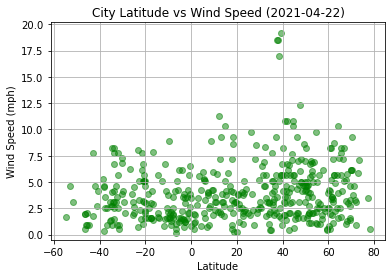

In [16]:
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], color='g', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')
plt.ylim(-0.5,(cities_df["Wind Speed"].max()+1))
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.savefig("../images/LatVsWind.png")
plt.show()

## Linear Regression

In [17]:
# Create Northern and Southern Hemisphere DataFrames
hemisphere_df = cities_df['Lat'] > 0
nth_hemisphere = cities_df[hemisphere_df]
sth_hemisphere = cities_df[~hemisphere_df]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.59x + 36.52
The r-value is: 0.7470791528838956


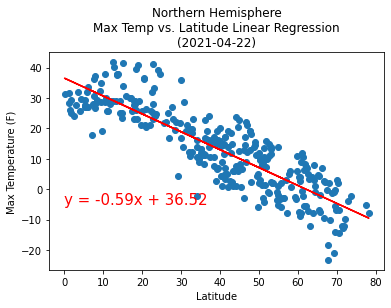

In [18]:
x_values = nth_hemisphere["Lat"]
y_values = nth_hemisphere["Max Temp"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

correlation = st.pearsonr(x_values, y_values)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Northern Hemisphere\nMax Temp vs. Latitude Linear Regression\n({datetime.now().date()})')
plt.annotate(line_eq,(0,-5),fontsize=15,color="r")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save and Show plot
plt.savefig("../images/NH_TempVsLat_LinearReg.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.37x + 29.95
The r-value is: 0.626211641959661


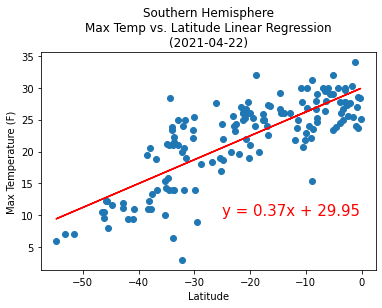

In [19]:
x_values = sth_hemisphere["Lat"]
y_values = sth_hemisphere["Max Temp"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

correlation = st.pearsonr(x_values, y_values)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Southern Hemisphere\nMax Temp vs. Latitude Linear Regression\n({datetime.now().date()})')
plt.annotate(line_eq,(-25,10),fontsize=15,color="r")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save and Show plot
plt.savefig("../images/SH_TempVsLat_LinearReg.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.34x + 50.23
The r-value is: 0.07356805524382083


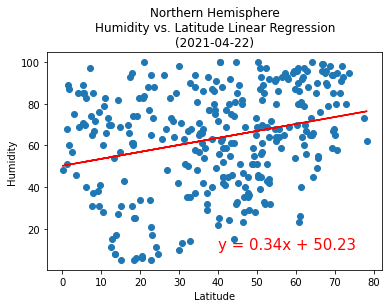

In [32]:
x_values = nth_hemisphere["Lat"]
y_values = nth_hemisphere["Humidity"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

correlation = st.pearsonr(x_values, y_values)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Northern Hemisphere\nHumidity vs. Latitude Linear Regression\n({datetime.now().date()})')
plt.annotate(line_eq,(40,10),fontsize=15,color="r")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save and Show plot
plt.savefig("../images/NH_HumidityVsLat_LinearReg.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.01x + 74.02
The r-value is: 4.799531459356656e-05


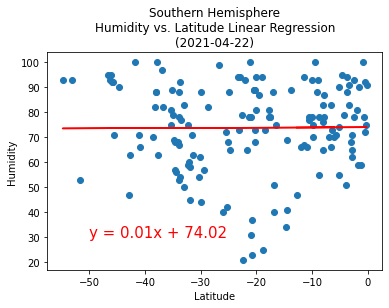

In [42]:
x_values = sth_hemisphere["Lat"]
y_values = sth_hemisphere["Humidity"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

correlation = st.pearsonr(x_values, y_values)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Southern Hemisphere\nHumidity vs. Latitude Linear Regression\n({datetime.now().date()})')
plt.annotate(line_eq,(-50,30),fontsize=15,color="r")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save and Show plot
plt.savefig("../images/SH_HumidityVsLat_LinearReg.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.29x + 44.97
The r-value is: 0.023037917048733852


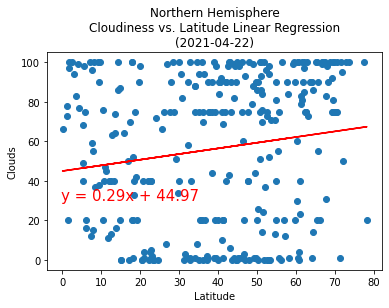

In [93]:
x_values = nth_hemisphere["Lat"]
y_values = nth_hemisphere["Clouds"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

correlation = st.pearsonr(x_values, y_values)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Clouds')
plt.title(f'Northern Hemisphere\nCloudiness vs. Latitude Linear Regression\n({datetime.now().date()})')
plt.annotate(line_eq,(-.25,30),fontsize=15,color="r")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save and Show plot
plt.savefig("../images/NH_CloudinessVsLat_LinearReg.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.13x + 60.73
The r-value is: 0.0024343484742962245


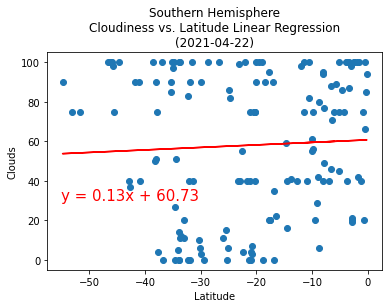

In [66]:
x_values = sth_hemisphere["Lat"]
y_values = sth_hemisphere["Clouds"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

correlation = st.pearsonr(x_values, y_values)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Clouds')
plt.title(f'Southern Hemisphere\nCloudiness vs. Latitude Linear Regression\n({datetime.now().date()})')
plt.annotate(line_eq,(-55,30),fontsize=15,color="r")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save and Show plot
plt.savefig("../images/SH_CloudinessVsLat_LinearReg.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.01x + 3.78
The r-value is: 0.0063058441271389935


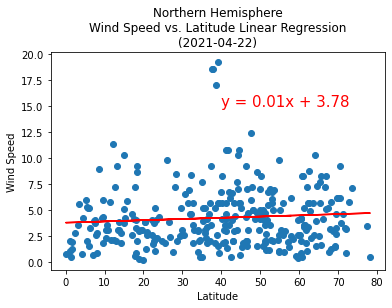

In [81]:
x_values = nth_hemisphere["Lat"]
y_values = nth_hemisphere["Wind Speed"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

correlation = st.pearsonr(x_values, y_values)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Northern Hemisphere\nWind Speed vs. Latitude Linear Regression\n({datetime.now().date()})')
plt.annotate(line_eq,(40,15),fontsize=15,color="r")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save and Show plot
plt.savefig("../images/NH_Wind SpeedVsLat_LinearReg.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.01x + 3.01
The r-value is: 0.004721503329221192


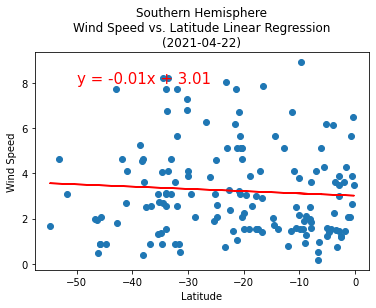

In [92]:
x_values = sth_hemisphere["Lat"]
y_values = sth_hemisphere["Wind Speed"]

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

correlation = st.pearsonr(x_values, y_values)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Southern Hemisphere\nWind Speed vs. Latitude Linear Regression\n({datetime.now().date()})')
plt.annotate(line_eq,(-50,8),fontsize=15,color="r")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save and Show plot
plt.savefig("../images/SH_Wind SpeedVsLat_LinearReg.png")
plt.show()